In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from math import  cos, sin, radians, asin, sqrt

C:\Users\User\AppData\Local\Temp\ipykernel_348\638574612.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Function to calculate distance between two GPS points using Haversine formula
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2*asin(sqrt(a))
    r = 6371
    return c * r

In [3]:
data = pd.read_csv('gps.csv')
data.head()

,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites
0,0.162580,65.060316,25.477432,20.016134,37.5,NaN,NaN,0.127569,80.919998,2.491908,0.0
1,1.385276,65.061438,25.477990,-63.384222,-45.9,2.826340,18.780001,0.237900,13.600000,25.600000,5.0
2,1.866819,65.060550,25.476942,-63.284008,-45.8,1.913223,8.780000,0.248834,8.200000,15.500000,11.0
3,2.372587,65.060530,25.476713,-63.284026,-45.8,1.362984,352.779999,0.255425,6.300000,15.900000,12.0
4,2.862231,65.060577,25.476627,-63.184053,-45.7,0.747891,327.000000,0.260067,5.200000,16.700001,13.0


In [4]:
lat = data['Latitude (°)']
lon = data['Longitude (°)']
 
data['dist'] = np.zeros(lat.shape[0])
data['time_diff'] = np.zeros(lat.shape[0])

for i in range(lat.shape[0]-1):
    data['dist'][i] = haversine(lon[i], lat[i], lon[i+1], lat[i+1])*1000
    data['time_diff'][i] = data['Time (s)'][i+1] - data['Time (s)'][i]

data['dist'][0] = 0
data['velocity'] = data['dist'] / data['time_diff']
data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_348\3189672950.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['dist'][i] = haversine(lon[i], lat[i], lon[i+1], lat[i+1])*1000
C:\Users\User\AppData\Local\Temp\ipykernel_348\3189672950.py:9

,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites,dist,time_diff,velocity
0,0.162580,65.060316,25.477432,20.016134,37.5,NaN,NaN,0.127569,80.919998,2.491908,0.0,0.000000,1.222696,0.000000
1,1.385276,65.061438,25.477990,-63.384222,-45.9,2.826340,18.780001,0.237900,13.600000,25.600000,5.0,110.331046,0.481543,229.119784
2,1.866819,65.060550,25.476942,-63.284008,-45.8,1.913223,8.780000,0.248834,8.200000,15.500000,11.0,10.934601,0.505767,21.619820
3,2.372587,65.060530,25.476713,-63.284026,-45.8,1.362984,352.779999,0.255425,6.300000,15.900000,12.0,6.590904,0.489645,13.460589
4,2.862231,65.060577,25.476627,-63.184053,-45.7,0.747891,327.000000,0.260067,5.200000,16.700001,13.0,4.642037,0.527017,8.808139


In [23]:
# %pip install folium
#import folium

location_frame = data[['Latitude (°)', 'Longitude (°)']]
location_list = location_frame.values.tolist()

ave_lat = np.mean(location_list, axis=0)[0]
ave_lon = np.mean(location_list, axis=0)[1]

my_map = folium.Map(location=[ave_lat, ave_lon], zoom_start=14)
folium.PolyLine(location_list, color="red", weight=2.5, opacity=1).add_to(my_map)
my_map.save("my_map.html")
my_map

Text(0, 0.5, 'Number of Satellites')

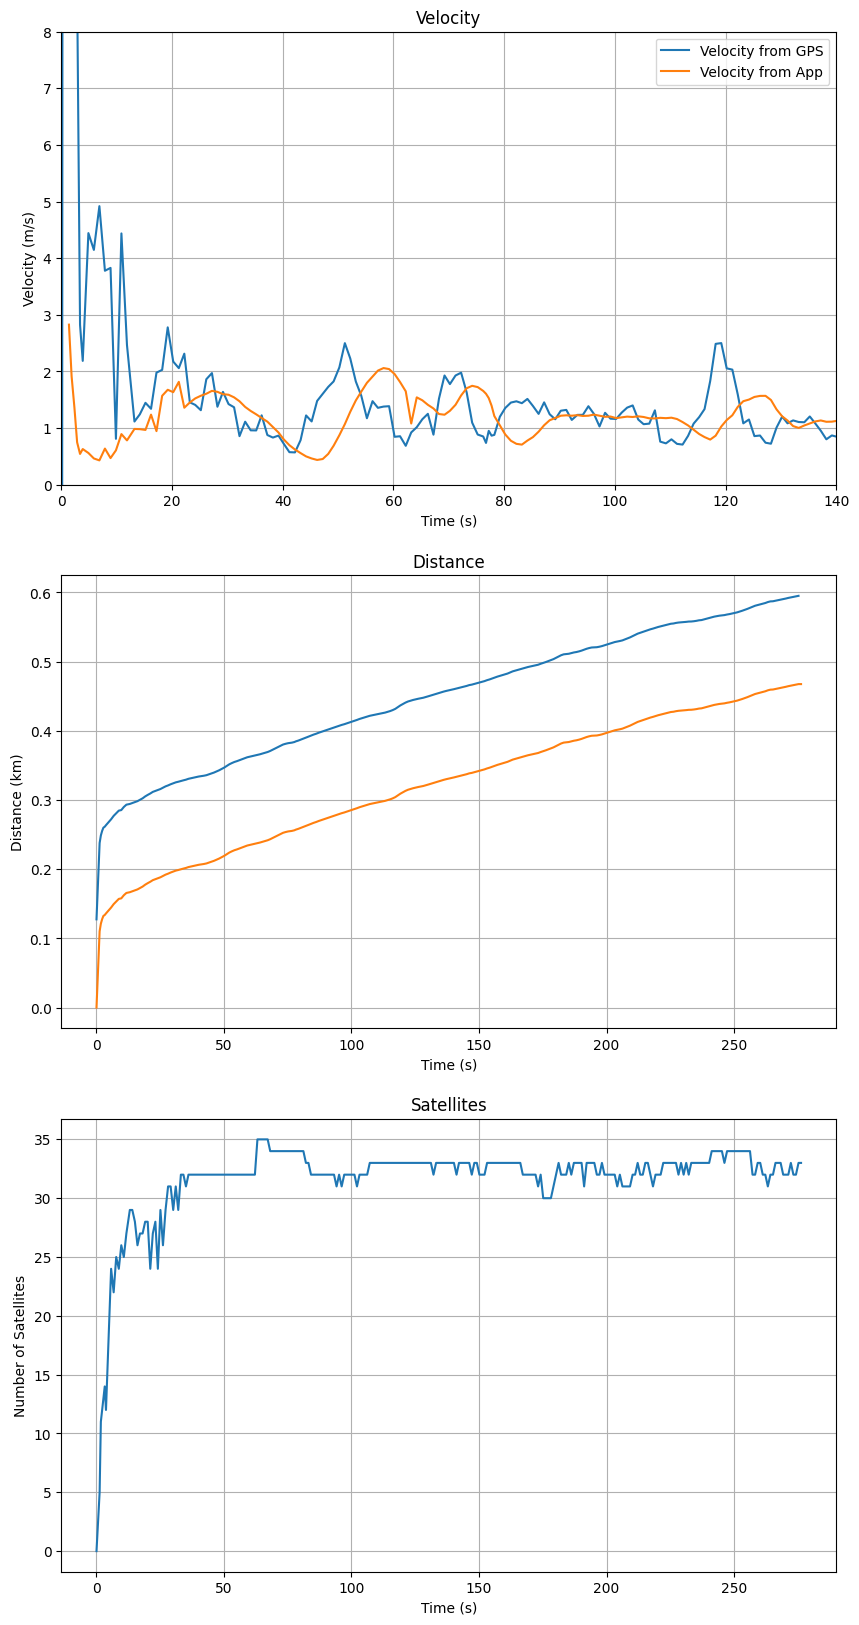

In [25]:
#%pip install matplotlib
#import matplotlib.pyplot as plt

plt.figure(figsize=(10, 20	))

plt.subplot(3,1,1)
plt.plot(data['Time (s)'], data['velocity']) #velocity from raw gps signal
plt.plot(data['Time (s)'], data['Speed (m/s)']) # speed from app
plt.legend(['Velocity from GPS', 'Velocity from App'])
plt.grid()
plt.title('Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.axis([0, 140, 0, 8])


plt.subplot(3,1,2)
plt.plot(data['Time (s)'], data['Distance (km)']) #distance derived from app
plt.plot(data['Time (s)'], np.cumsum(data['dist'])/1000) # distance  from gps signal
# plt.legend(['Velocity from GPS', 'Velocity from App'])
plt.grid()
plt.title('Distance')
plt.xlabel('Time (s)')
plt.ylabel('Distance (km)')
# plt.axis([0, 140, 0, 8])

plt.subplot(3,1,3)
plt.plot(data['Time (s)'], data['Satellites'])
plt.grid()
plt.title('Satellites')
plt.xlabel('Time (s)')
plt.ylabel('Number of Satellites')